In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
refit_df = pd.read_hdf('../../data/refit/house_3_300s.hdf')

In [3]:
refit_df.describe()

,X_tumble_dryer,X_washing_machine,X_dishwasher,X_exp_power
count,157172.000000,157172.000000,157172.000000,177020.000000
mean,55.141896,28.657253,49.352924,362.429303
std,308.177335,194.847458,298.567494,634.898121
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,442.111250
max,2579.071429,2216.204082,2249.918367,3035.660000


In [4]:
pd.infer_freq(refit_df.index)

'5T'

/home/philippe/src/git.ihomelab.ch/SccerPhase2/load-shifting-potential/.venv/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


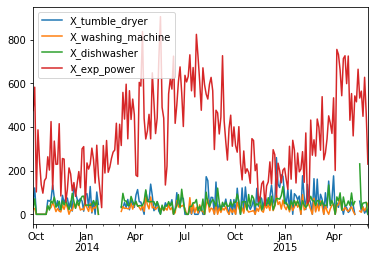

In [5]:
refit_df.resample('3D').mean().plot();

/home/philippe/src/git.ihomelab.ch/SccerPhase2/load-shifting-potential/.venv/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


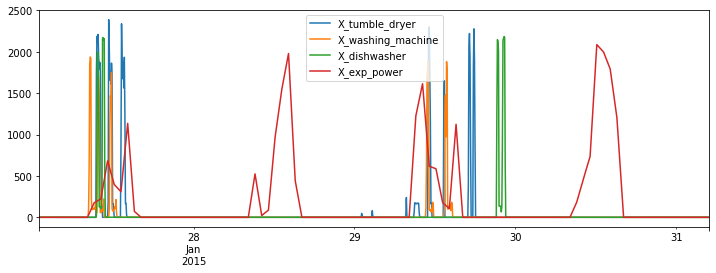

In [6]:
def random_window(df, window_length):
    i = random.randrange(len(df) - window_length)
    return df.iloc[i:i + window_length]

sample_df = random_window(refit_df, 12 * 100)
sample_df.plot(figsize=(12, 4));

In [147]:
ihl_df = pd.read_hdf('../../data/published_data_vs01/data/dfC_300s.hdf')

In [148]:
ihl_df.describe()

,C_batt_state,C_boilertemp_bottom,C_boilertemp_top,C_boiler_heater_1_on,C_boiler_heater_2_on,C_boiler_heater_3_on,C_boiler_on_relay,C_boiler_on_thermostat,C_boiler_on_utility,C_boiler_power,...,C_from_batt_power,C_from_net_power,C_hp_power,C_pv_prod_power,C_solarlog_radiation,C_temperature_out,C_total_cons_power,C_to_batt_power,C_to_net_power,C_hp_on_utility
count,174603.000000,350922.000000,350922.000000,188025.000000,188025.000000,188025.000000,162897.000000,350922.000000,162897.000000,188025.000000,...,182955.000000,182955.000000,385535.000000,182955.000000,139523.000000,370118.000000,374834.000000,182955.000000,182955.000000,376393.000000
mean,59.641021,37.762374,48.435462,0.062553,0.044372,0.039521,0.007158,0.389987,0.052929,193.941852,...,104.771360,85.996248,696.939977,792.534796,164.402767,12.680812,451.475630,122.153396,368.194510,0.681434
std,35.543447,14.208690,8.215685,0.242151,0.205920,0.194832,0.084301,0.487748,0.223893,707.527663,...,149.782487,446.277335,1524.302809,1389.468839,279.754374,8.406490,905.478405,330.124292,1038.517445,0.465921
min,0.000000,11.900000,16.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.100000,8.520000,0.000000,0.000000,0.000000
25%,32.000000,25.100000,42.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,10.000000,0.000000,0.000000,5.650000,120.000000,0.000000,0.000000,0.000000
50%,67.000000,36.700000,49.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54.480000,0.240000,60.000000,1.440000,4.000000,11.800000,180.000000,0.000000,0.000000,1.000000
75%,94.000000,49.900000,55.400000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,169.740000,7.920000,70.000000,892.320000,198.000000,18.900000,280.000000,0.360000,5.760000,1.000000
max,100.000000,68.100000,61.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4431.000000,...,3043.080000,7188.000000,22860.000000,9759.720000,1325.500000,48.100000,8325.000000,6986.400000,9292.200000,1.000000


In [149]:
pd.infer_freq(ihl_df.index)

'5T'

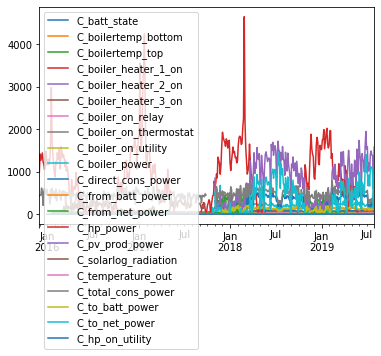

In [150]:
ihl_df.resample('3D').mean().plot();

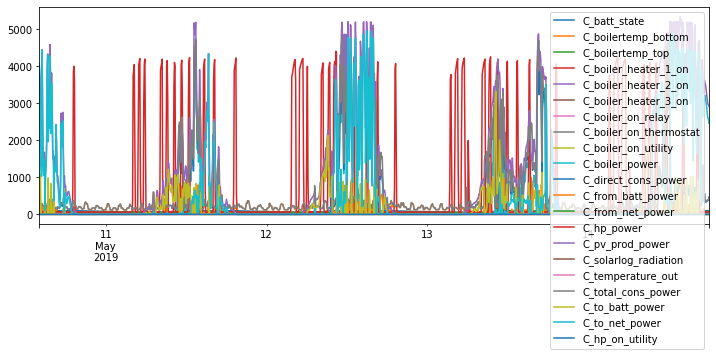

In [151]:
sample_df = random_window(ihl_df, 12 * 100)
sample_df.plot(figsize=(12, 4));

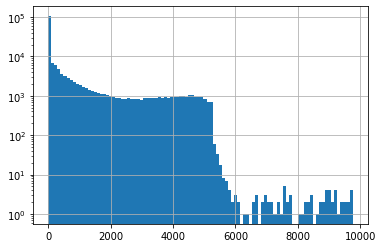

In [153]:
ihl_df['C_pv_prod_power'].hist(bins=100, log=True);

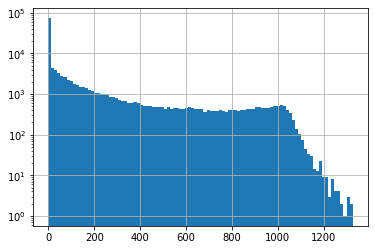

In [154]:
ihl_df['C_solarlog_radiation'].hist(bins=100, log=True);

In [156]:
temp = ihl_df['C_solarlog_radiation'].dropna().index
temp.min(), temp.max()

(Timestamp('2016-02-26 17:30:00'), Timestamp('2017-09-22 00:00:00'))

In [157]:
ihl_df.index.min(), ihl_df.index.max()

(Timestamp('2015-11-30 00:00:00', freq='300S'),
 Timestamp('2019-07-31 00:00:00', freq='300S'))

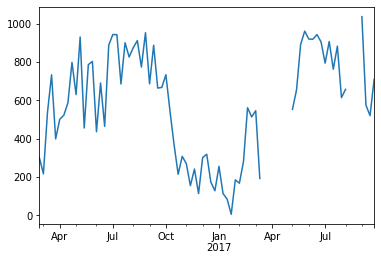

In [191]:
ihl_df['C_solarlog_radiation'].dropna().resample('1W').quantile(0.9).plot();